## <b> Importing Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import os

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_samples, silhouette_score


=======================================================================================================================

# Preparing Data

I used some Excel skills to convert these txt files to Excel file as python can convert them to Excel file in goodway!

=======================================================================================================================

## <b> Importing , Wrangling & Reading Data

In [3]:
if not os.path.isfile('MainData.csv'):
    
    data = open('MainData.csv', mode='w')
    
    row = list()
    files=['combined_data_1.txt','combined_data_2.txt', 'combined_data_3.txt', 'combined_data_4.txt']
    for file in files:
        with open(file) as f:
            for line in f: 
                del row[:] 
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()

In [4]:
MoviesAndUsersData = pd.read_csv('MainData.csv', sep=',', names=['movie', 'user','rating','date'])

In [5]:
MoviesAndUsersData.rename(columns={'movie':'MovieID',
                          'user':'UserID',
                          'rating':'Ratings',
                          'date':'DateOfRate'}, inplace=True)

In [6]:
MoviesAndUsersData.head()

,MovieID,UserID,Ratings,DateOfRate
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [7]:
MoviesAndUsersData.tail()

,MovieID,UserID,Ratings,DateOfRate
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28
100480506,17770,453585,2,2005-03-10


In [8]:
MoviesAndUsersData.shape

(100480507, 4)

In [9]:
MoviesData = pd.read_csv("movie_titles.csv" , header=None, encoding='latin-1')

In [10]:
MoviesData.head()

,0,1,2,3,4,5
0,1,2003.0,Dinosaur Planet,NaN,NaN,NaN
1,2,2004.0,Isle of Man TT 2004 Review,NaN,NaN,NaN
2,3,1997.0,Character,NaN,NaN,NaN
3,4,1994.0,Paula Abdul's Get Up & Dance,NaN,NaN,NaN
4,5,2004.0,The Rise and Fall of ECW,NaN,NaN,NaN


In [11]:
MoviesData.tail()

,0,1,2,3,4,5
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,NaN,NaN,NaN
17766,17767,2004.0,Fidel Castro: American Experience,NaN,NaN,NaN
17767,17768,2000.0,Epoch,NaN,NaN,NaN
17768,17769,2003.0,The Company,NaN,NaN,NaN
17769,17770,2003.0,Alien Hunter,NaN,NaN,NaN


In [12]:
MoviesData.shape

(17770, 6)

In [13]:
MoviesData.columns = ['MovieID', 'RealeaseDateOfMovie', 'MovieName', 'x','y','z']

In [14]:
MoviesData.drop(['x','y','z'],axis=1,inplace=True)

In [15]:
MoviesData.head()

,MovieID,RealeaseDateOfMovie,MovieName
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


=======================================================================================================================

## <b> Data Cleaning

In [16]:
MoviesAndUsersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   MovieID     int64 
 1   UserID      int64 
 2   Ratings     int64 
 3   DateOfRate  object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [17]:
MoviesAndUsersData.isna().sum()

MovieID       0
UserID        0
Ratings       0
DateOfRate    0
dtype: int64

In [18]:
MoviesAndUsersData["DateOfRate"] = pd.to_datetime(MoviesAndUsersData["DateOfRate"])

In [19]:
MoviesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MovieID              17770 non-null  int64  
 1   RealeaseDateOfMovie  17763 non-null  float64
 2   MovieName            17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [20]:
MoviesData.isna().sum()

MovieID                0
RealeaseDateOfMovie    7
MovieName              0
dtype: int64

In [21]:
MoviesData.dropna(axis=0,inplace = True)

In [22]:
MoviesData["RealeaseDateOfMovie"] = MoviesData["RealeaseDateOfMovie"].astype(int)

=======================================================================================================================

## <b> Our Data after Cleaning & Wrangling

In [23]:
MoviesAndUsersData.head()

,MovieID,UserID,Ratings,DateOfRate
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [24]:
MoviesData.head()

,MovieID,RealeaseDateOfMovie,MovieName
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


=======================================================================================================================

## <b> Joining The Data Together 

In [25]:
AllData = pd.merge(MoviesAndUsersData,MoviesData,on="MovieID")

In [26]:
AllData.head()

,MovieID,UserID,Ratings,DateOfRate,RealeaseDateOfMovie,MovieName
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet


In [27]:
AllData.sort_values(by='DateOfRate',inplace=True)

In [28]:
AllData.head()

,MovieID,UserID,Ratings,DateOfRate,RealeaseDateOfMovie,MovieName
62228069,11313,510180,2,1999-11-11,1996,Evita
45315525,8079,510180,2,1999-11-11,1994,Interview with the Vampire
53876665,9798,510180,3,1999-11-11,1998,A Civil Action
14892677,2866,510180,3,1999-11-11,1999,Message in a Bottle
6901473,1367,510180,5,1999-11-11,1993,The Piano


=======================================================================================================================

## <b> Exploring Data Analysis

In [29]:
AllData.groupby('MovieName')['Ratings'].mean().sort_values(ascending=False).head()

MovieName
Lord of the Rings: The Return of the King: Extended Edition            4.723270
The Lord of the Rings: The Fellowship of the Ring: Extended Edition    4.716611
Lord of the Rings: The Two Towers: Extended Edition                    4.702611
Lost: Season 1                                                         4.670989
Battlestar Galactica: Season 1                                         4.638809
Name: Ratings, dtype: float64

In [30]:
AllData.groupby('MovieName')['Ratings'].count().sort_values(ascending=False).head()

MovieName
Miss Congeniality         232944
Independence Day          216596
The Patriot               211764
The Godfather             206551
The Day After Tomorrow    196397
Name: Ratings, dtype: int64

In [31]:
RatingsOfMovies = pd.DataFrame(AllData.groupby('MovieName')['Ratings'].mean().sort_values(ascending=False))
RatingsOfMovies.head()

,Ratings
MovieName,
Lord of the Rings: The Return of the King: Extended Edition,4.723270
The Lord of the Rings: The Fellowship of the Ring: Extended Edition,4.716611
Lord of the Rings: The Two Towers: Extended Edition,4.702611
Lost: Season 1,4.670989
Battlestar Galactica: Season 1,4.638809


In [32]:
RatingsOfMovies['Number of Ratings'] = pd.DataFrame(AllData.groupby('MovieName')['Ratings'].count().sort_values(ascending=False))
RatingsOfMovies.head()

,Ratings,Number of Ratings
MovieName,,
Lord of the Rings: The Return of the King: Extended Edition,4.723270,73335
The Lord of the Rings: The Fellowship of the Ring: Extended Edition,4.716611,73422
Lord of the Rings: The Two Towers: Extended Edition,4.702611,74912
Lost: Season 1,4.670989,7249
Battlestar Galactica: Season 1,4.638809,1747


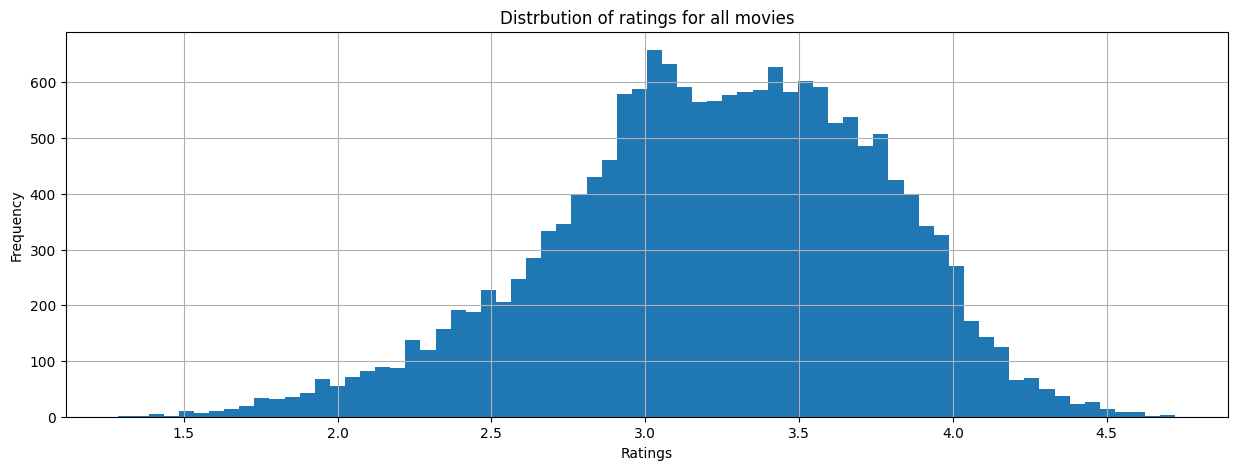

In [33]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Ratings")
    plt.ylabel("Frequency")
    plt.title("Distrbution of ratings for all movies")
    plt.hist(RatingsOfMovies['Ratings'],bins=70)
    plt.grid()
    plt.show()

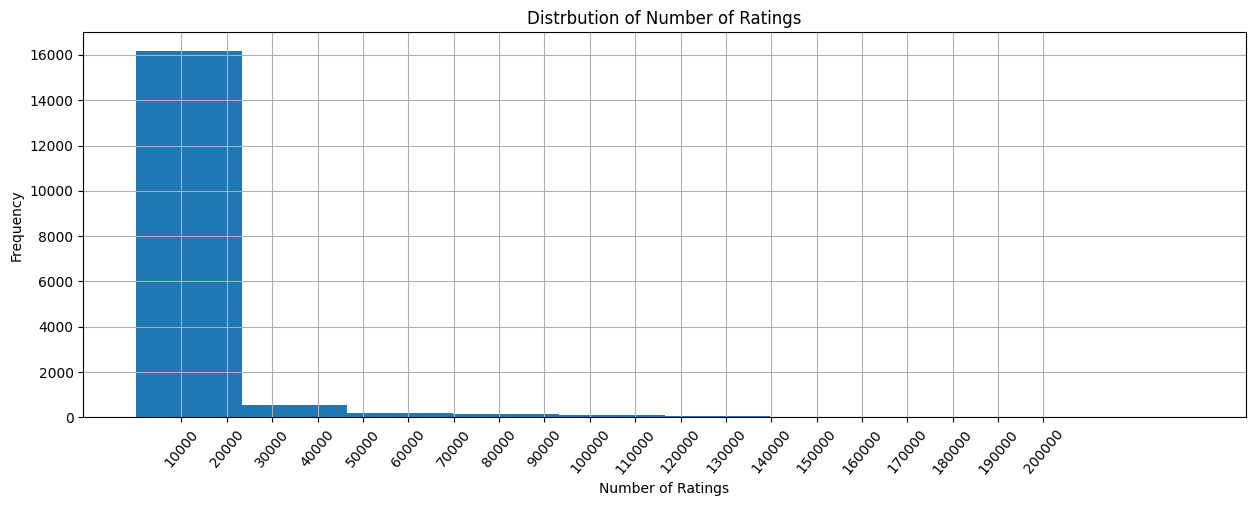

In [34]:
bins = range(10000,210000,10000)
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Number of Ratings")
    plt.ylabel("Frequency")
    plt.title("Distrbution of Number of Ratings")
    plt.hist(RatingsOfMovies['Number of Ratings'])
    plt.xticks(bins,rotation = 50)
    plt.grid()
    plt.show()

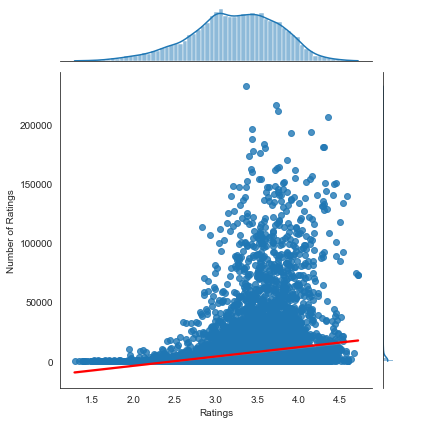

In [35]:
x = sns.set_style("white")

x = sns.jointplot(x='Ratings',y='Number of Ratings',data=RatingsOfMovies,kind='reg', joint_kws={'line_kws':{'color':'Red'}})

=======================================================================================================================

# Data Pre-Processing

In [124]:
AllData2 = AllData.copy()

In [126]:
AllData2_le = LabelEncoder()
AllData2["MovieName"] = AllData2_le.fit_transform(AllData2["MovieName"])

In [127]:
AllData2_le2 = LabelEncoder()
AllData2["DateOfRate"] = AllData2_le2.fit_transform(AllData2["DateOfRate"])

In [172]:
AllData2[0:500000] = np.array(AllData2[0:500000])

=======================================================================================================================

# Elbow Method

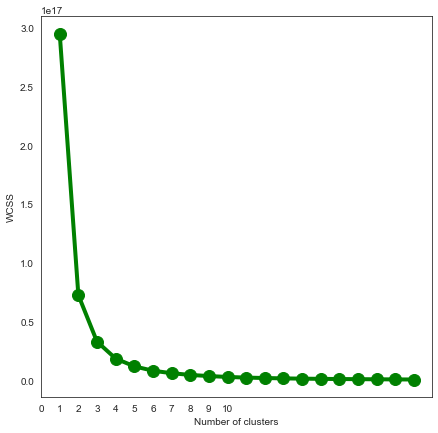

In [133]:
WCSS = []
for i in range(1,21):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(AllData2[0:500000])
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,21),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

=======================================================================================================================

# Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.6063737237248872
For n_clusters = 3 The average silhouette_score is : 0.6084729022156238
For n_clusters = 4 The average silhouette_score is : 0.6054246238687683
For n_clusters = 5 The average silhouette_score is : 0.5922063636906032
For n_clusters = 6 The average silhouette_score is : 0.5728485893848442


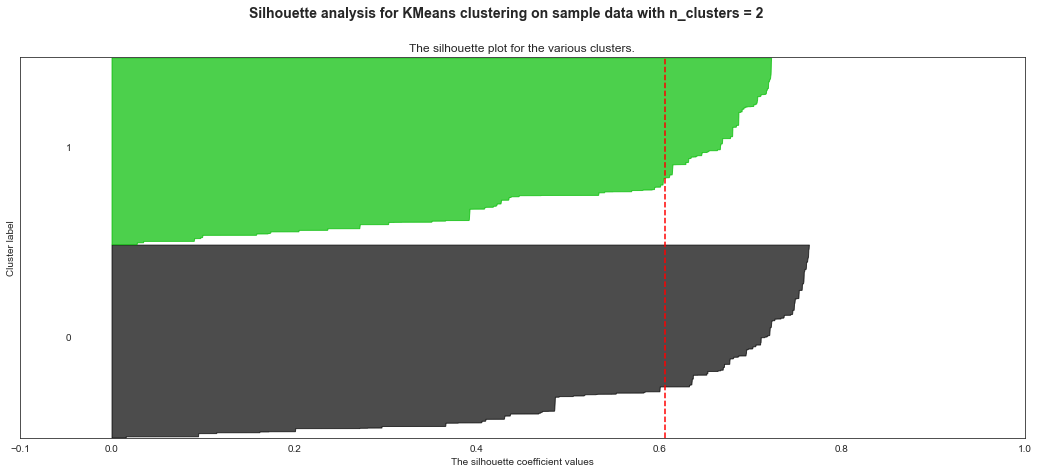

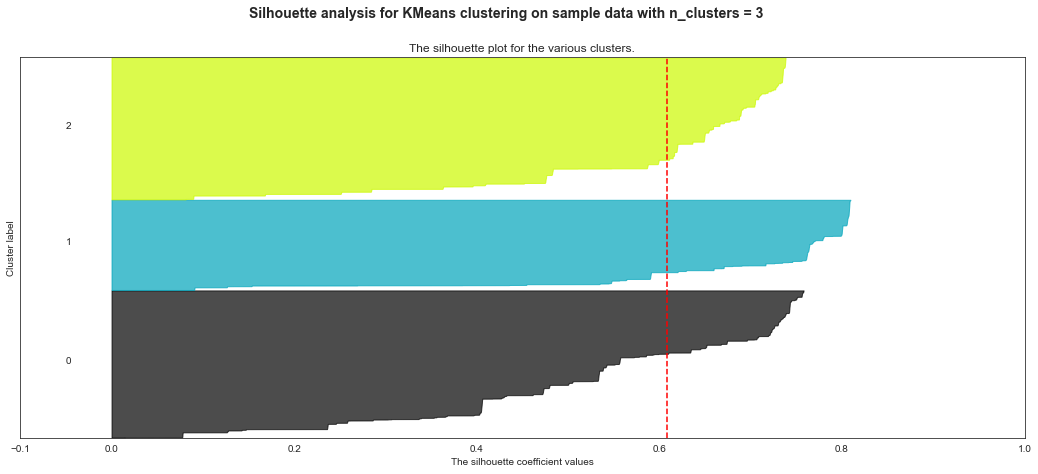

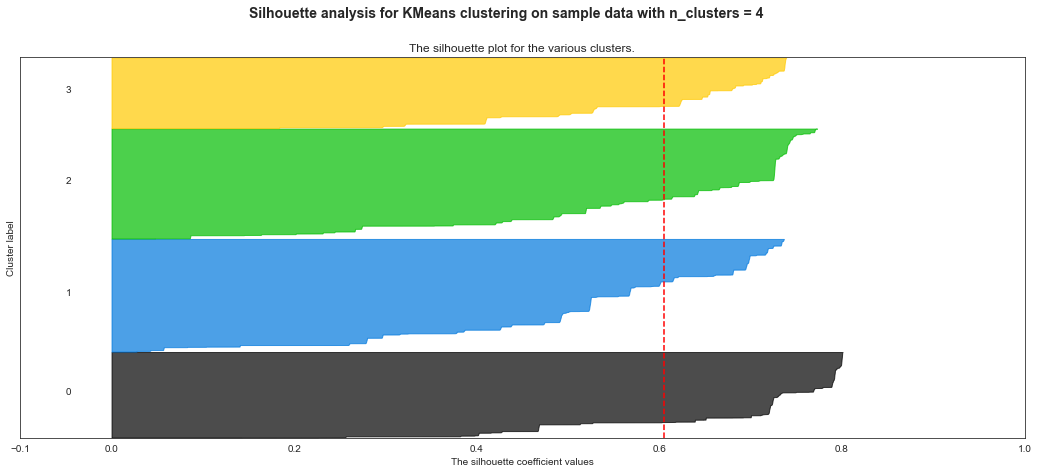

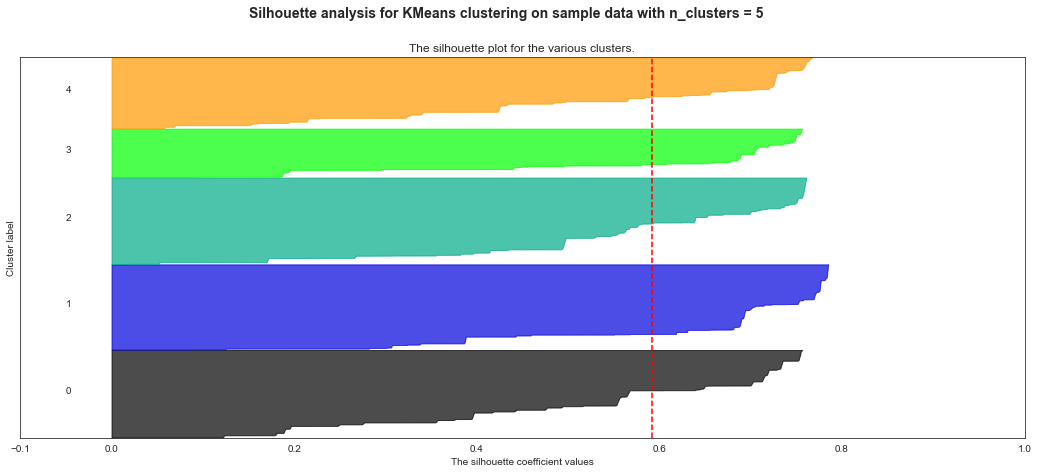

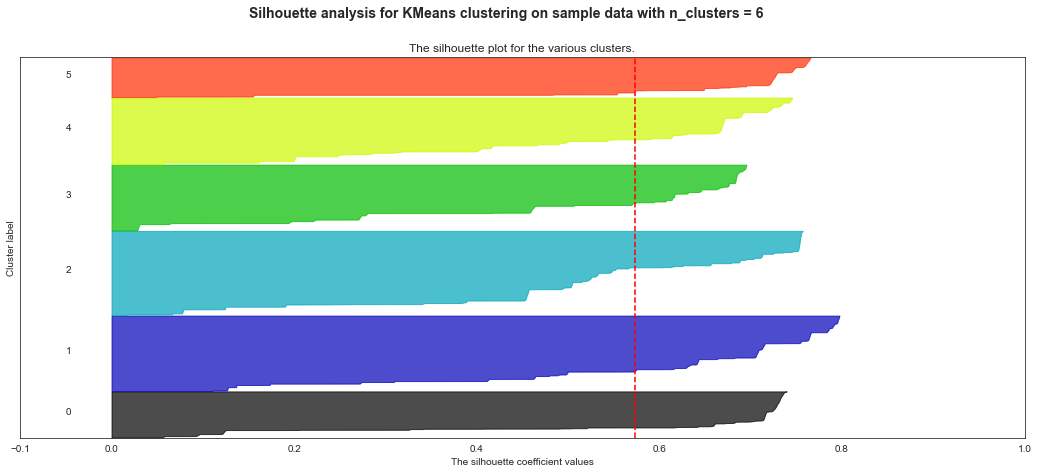

In [176]:

for n_clusters in range(2,7):
    
    fig, ax1 = plt.subplots(figsize = (15,5))
    fig.set_size_inches(18, 7)

   
    ax1.set_xlim([-0.1, 1])
   
    ax1.set_ylim([0, len(AllData2[0:10000]) + (n_clusters + 1) * 10])

  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(AllData2[0:10000])

   
    silhouette_avg = silhouette_score(AllData2[0:10000], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    
    sample_silhouette_values = silhouette_samples(AllData2[0:10000], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

=======================================================================================================================

# Clustering (K-MEANS)

In [136]:
cluster = KMeans(n_clusters=4, random_state= 44 )
kmeans_predictions = cluster.fit_predict(AllData2[0:500000])

In [137]:
pd.value_counts(kmeans_predictions)

3    128924
2    128155
1    122962
0    119959
dtype: int64

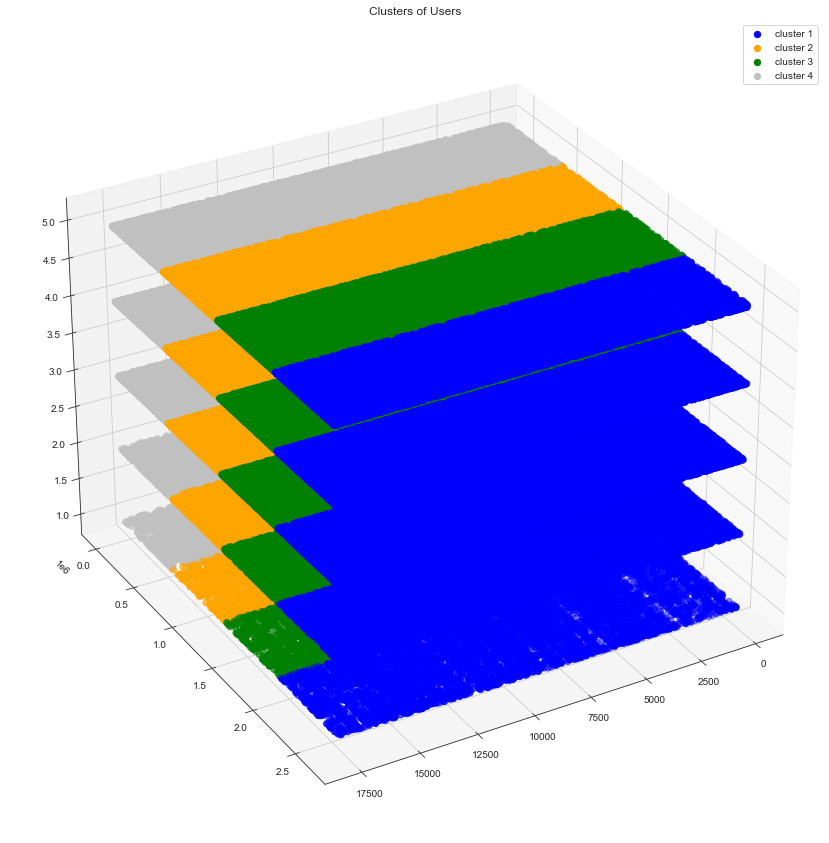

In [175]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(AllData2[0:500000])[kmeans_predictions == 0,0],np.array(AllData2[0:500000])[kmeans_predictions == 0,1],np.array(AllData2[0:500000])[kmeans_predictions == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(np.array(AllData2[0:500000])[kmeans_predictions == 1,0],np.array(AllData2[0:500000])[kmeans_predictions == 1,1],np.array(AllData2[0:500000])[kmeans_predictions == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(np.array(AllData2[0:500000])[kmeans_predictions == 2,0],np.array(AllData2[0:500000])[kmeans_predictions == 2,1],np.array(AllData2[0:500000])[kmeans_predictions == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(np.array(AllData2[0:500000])[kmeans_predictions == 3,0],np.array(AllData2[0:500000])[kmeans_predictions == 3,1],np.array(AllData2[0:500000])[kmeans_predictions == 3,2], s = 40 , color = 'silver', label = "cluster 4")
ax.legend()
ax.view_init(30, 60)
plt.title('Clusters of Users')
plt.show()

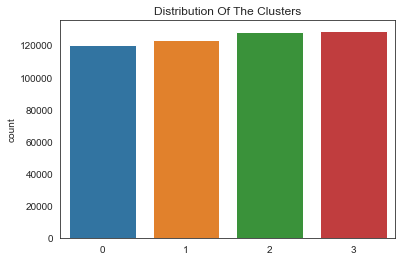

In [140]:
pl = sns.countplot(x= kmeans_predictions)
pl.set_title("Distribution Of The Clusters")
plt.show()

=======================================================================================================================

# Clustering (AgglomerativeClustering) 

In [174]:
cluster2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
predictions2 = cluster2.fit_predict(AllData2[0:20000])

In [167]:
pd.value_counts(predictions2)

0    7894
1    5099
2    4472
3    2535
dtype: int64

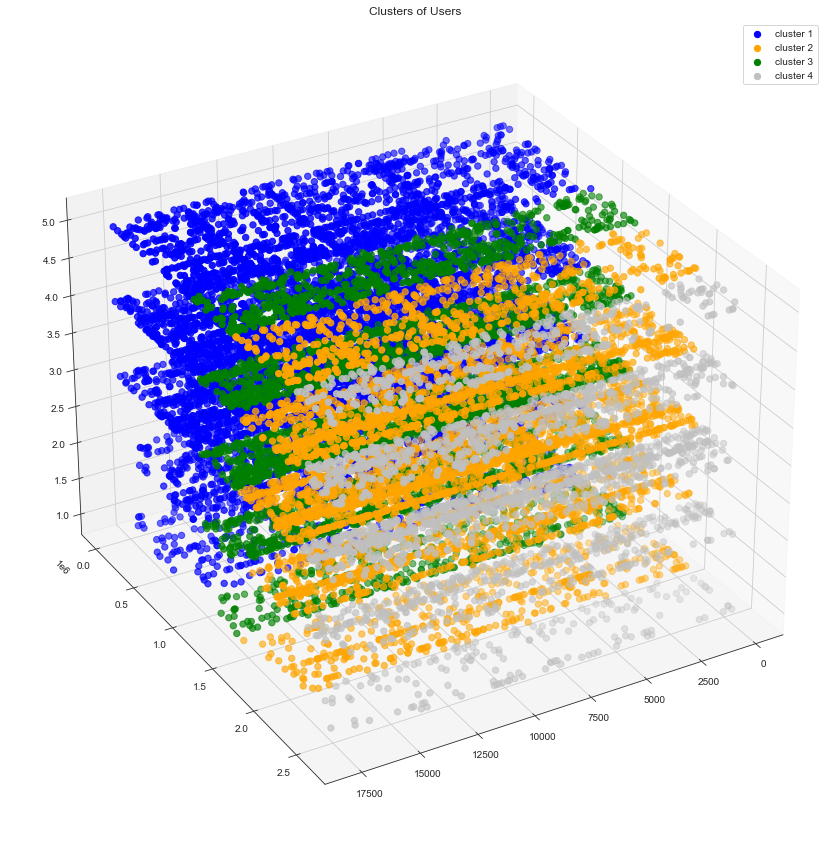

In [178]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(AllData2[0:20000])[predictions2 == 0,0],np.array(AllData2[0:20000])[predictions2 == 0,1],np.array(AllData2[0:20000])[predictions2 == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(np.array(AllData2[0:20000])[predictions2 == 1,0],np.array(AllData2[0:20000])[predictions2 == 1,1],np.array(AllData2[0:20000])[predictions2 == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(np.array(AllData2[0:20000])[predictions2 == 2,0],np.array(AllData2[0:20000])[predictions2 == 2,1],np.array(AllData2[0:20000])[predictions2 == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(np.array(AllData2[0:20000])[predictions2 == 3,0],np.array(AllData2[0:20000])[predictions2 == 3,1],np.array(AllData2[0:20000])[predictions2 == 3,2], s = 40 , color = 'silver', label = "cluster 4")
ax.legend()
ax.view_init(30, 60)
plt.title('Clusters of Users')
plt.show()

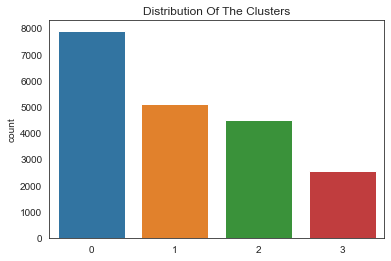

In [168]:
pl = sns.countplot(x= predictions2)
pl.set_title("Distribution Of The Clusters")
plt.show()

## By Sampling, The two clustering methods didn't make the same clustering.
## This leads us that data may not be detailed enough.

=======================================================================================================================

## <b> Recommendation System

## Item-Item

Using just 1,000,000 Row Because of Memory

In [36]:
ItemItemTable = AllData[62000000:63000000].pivot_table(index='UserID',columns='MovieName',values='Ratings')
ItemItemTable.head()

MovieName,'Allo 'Allo!: Series 1,'Allo 'Allo!: Series 2,'N Sync: 'N the Mix,'N Sync: Live at Madison Square Garden,'N Sync: Making of the Tour,'N Sync: PopOdyssey Live,'Round Midnight,... And God Spoke,...And Justice for All,...And Then Came Summer,...,Zombie Holocaust,Zoolander,Zoot Suit,Zorba the Greek,Zorro,Zulu,Zus & Zo,e-Dreams,s-Cry-ed,sex
UserID,,,,,,,,,,,,,,,,,,,,,
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
RatingsOfMovies[0:1000000].sort_values('Number of Ratings',ascending=False).head(10)

,Ratings,Number of Ratings
MovieName,,
Miss Congeniality,3.361267,232944
Independence Day,3.724238,216596
The Patriot,3.747955,211764
The Godfather,4.355263,206551
The Day After Tomorrow,3.442166,196397
Pirates of the Caribbean: The Curse of the Black Pearl,4.153908,193941
Pretty Woman,3.905047,193295
Twister,3.436680,187808
Gone in 60 Seconds,3.578877,183590


In [38]:
ForrestGump_User_Ratings = ItemItemTable['Forrest Gump']

In [39]:
ForrestGump_User_Ratings.value_counts()

5.0    767
4.0    498
3.0    175
2.0     47
1.0     21
Name: Forrest Gump, dtype: int64

In [40]:
Similar_to_ForrestGump = ItemItemTable.corrwith(ForrestGump_User_Ratings)

c:\Users\omara\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\Users\omara\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
Corr_ForrestGump = pd.DataFrame(Similar_to_ForrestGump,columns=['Correlation'])
Corr_ForrestGump.dropna(inplace=True)
Corr_ForrestGump.head()

,Correlation
MovieName,
...And Justice for All,-0.072548
10 Things I Hate About You,0.275375
10.5,-1.000000
101 Dalmatians II: Patch's London Adventure,0.178197
11-Sep,-0.500000


In [42]:
Corr_ForrestGump.sort_values('Correlation',ascending=False).head(10)

,Correlation
MovieName,
George Carlin: Back in Town,1.0
MASH: Season 7,1.0
Saved by the Bell: The New Class: Season 1,1.0
Teaching Mrs. Tingle,1.0
Once Around,1.0
Saved by the Bell: The College Years: Season 1,1.0
Pompeii: The Last Day,1.0
Lionheart,1.0
Dinner for Five: Season 1,1.0


In [43]:
Corr_ForrestGump = Corr_ForrestGump.join(RatingsOfMovies['Number of Ratings'])
Corr_ForrestGump.head()

,Correlation,Number of Ratings
MovieName,,
...And Justice for All,-0.072548,6350
10 Things I Hate About You,0.275375,46978
10.5,-1.000000,2187
101 Dalmatians II: Patch's London Adventure,0.178197,6642
11-Sep,-0.500000,5192


In [44]:
Corr_ForrestGump[Corr_ForrestGump['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
MovieName,,
George Carlin: Back in Town,1.0,2715
MASH: Season 7,1.0,5025
Saved by the Bell: The New Class: Season 1,1.0,228
Teaching Mrs. Tingle,1.0,6191
Once Around,1.0,681


=======================================================================================================================

## Function for Item based Recommendation

In [75]:
def ItemRecommender(Movie):
    Choice_User_Ratings = ItemItemTable[Movie]
    Similar_to_Choice = ItemItemTable.corrwith(Choice_User_Ratings)
    Corr_Choice = pd.DataFrame(Similar_to_Choice,columns=['Correlation'])
    Corr_Choice.dropna(inplace=True)
    Corr_Choice = Corr_Choice.join(RatingsOfMovies['Number of Ratings'])
    x = Corr_Choice[Corr_Choice['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

    return x

In [76]:
x = str(input("Enter Movie Name: "))
print("Movies similar to" , x , "-->") 
ItemRecommender(x)

Movies similar to Forrest Gump -->


c:\Users\omara\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\Users\omara\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Number of Ratings
MovieName,,
George Carlin: Back in Town,1.0,2715
MASH: Season 7,1.0,5025
Saved by the Bell: The New Class: Season 1,1.0,228
Teaching Mrs. Tingle,1.0,6191
Once Around,1.0,681


=======================================================================================================================

# User-User

In [88]:
UserUserTable = AllData[0:10000].pivot_table(index='UserID',columns='MovieName',values='Ratings')
UserUserTable.fillna(0,inplace=True)
UserUserTable.head()

MovieName,'N Sync: 'N the Mix,10,10 Things I Hate About You,12 Monkeys,2 Days in the Valley,200 Cigarettes,2001: A Space Odyssey,2010: The Year We Make Contact,36 Fillette,48 Hrs.,...,Yellow Submarine,Yellowstone: IMAX,Yes Madam,Yes: Live in Philadelphia,Yojimbo,You've Got Mail,Young Guns,Young Guns II,Zero Effect,sex
UserID,,,,,,,,,,,,,,,,,,,,,
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
13891,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
UserUser_Similarity = UserUserTable.T.corr()
UserUser_Similarity.head()

UserID,1086,10268,13891,28966,64765,100197,108871,117768,122223,141370,...,2464917,2486445,2494857,2503019,2522229,2558570,2614004,2619286,2636512,2636537
UserID,,,,,,,,,,,,,,,,,,,,,
1086,1.000000,-0.009075,0.163422,-0.006329,0.075866,0.137857,0.032815,0.113655,0.129030,0.065391,...,0.215590,0.028757,-0.007460,-0.013420,0.136108,-0.006329,0.062672,0.031378,0.173468,-0.009925
10268,-0.009075,1.000000,0.010456,-0.008000,0.082461,0.038093,0.029187,0.022793,0.016865,0.060528,...,0.071064,-0.022416,-0.009431,0.026956,0.027799,-0.008000,0.003217,-0.007589,0.023892,-0.012547
13891,0.163422,0.010456,1.000000,-0.010136,0.164098,0.015776,0.098751,0.115355,0.171541,0.082415,...,0.143136,0.096595,-0.011948,-0.021493,0.044689,-0.010136,0.115978,0.107340,0.088651,-0.015897
28966,-0.006329,-0.008000,-0.010136,1.000000,0.108096,-0.003963,-0.003898,-0.004142,-0.009261,0.157816,...,-0.005403,-0.004087,-0.001720,-0.003093,-0.007387,0.165451,-0.007539,-0.001384,-0.006161,-0.002288
64765,0.075866,0.082461,0.164098,0.108096,1.000000,0.004684,0.106245,-0.020507,0.054076,0.067158,...,0.129997,0.019441,-0.008515,0.037556,0.101209,-0.007223,0.029307,-0.006852,0.164780,0.008767


In [64]:
PickedUserID = 1086

UserUser_Similarity.drop(index=PickedUserID, inplace=True)

UserUser_Similarity.head()

UserID,1086,10268,13891,28966,64765,100197,108871,117768,122223,141370,...,2464917,2486445,2494857,2503019,2522229,2558570,2614004,2619286,2636512,2636537
UserID,,,,,,,,,,,,,,,,,,,,,
10268,-0.009075,1.000000,0.010456,-0.008000,0.082461,0.038093,0.029187,0.022793,0.016865,0.060528,...,0.071064,-0.022416,-0.009431,0.026956,0.027799,-0.008000,0.003217,-0.007589,0.023892,-0.012547
13891,0.163422,0.010456,1.000000,-0.010136,0.164098,0.015776,0.098751,0.115355,0.171541,0.082415,...,0.143136,0.096595,-0.011948,-0.021493,0.044689,-0.010136,0.115978,0.107340,0.088651,-0.015897
28966,-0.006329,-0.008000,-0.010136,1.000000,0.108096,-0.003963,-0.003898,-0.004142,-0.009261,0.157816,...,-0.005403,-0.004087,-0.001720,-0.003093,-0.007387,0.165451,-0.007539,-0.001384,-0.006161,-0.002288
64765,0.075866,0.082461,0.164098,0.108096,1.000000,0.004684,0.106245,-0.020507,0.054076,0.067158,...,0.129997,0.019441,-0.008515,0.037556,0.101209,-0.007223,0.029307,-0.006852,0.164780,0.008767
100197,0.137857,0.038093,0.015776,-0.003963,0.004684,1.000000,0.082265,0.040976,0.095421,0.086588,...,0.049084,-0.011104,-0.004672,-0.008404,-0.020069,0.183676,-0.020481,-0.003760,-0.001046,-0.006216


In [69]:
N = 10
User_Similarity_Threshold = 0.3
Similar_Users = UserUser_Similarity[UserUser_Similarity[PickedUserID]>User_Similarity_Threshold][PickedUserID].sort_values(ascending=False)[:N]

print(f'The similar users for user {PickedUserID} are', Similar_Users)

The similar users for user 1086 are UserID
1997050    0.351945
1033135    0.318967
1446059    0.309975
Name: 1086, dtype: float64


In [70]:
PickedUserIdWatched = UserUserTable[UserUserTable.index == PickedUserID].dropna(axis=1, how='all')
PickedUserIdWatched

MovieName,'N Sync: 'N the Mix,10,10 Things I Hate About You,12 Monkeys,2 Days in the Valley,200 Cigarettes,2001: A Space Odyssey,2010: The Year We Make Contact,36 Fillette,48 Hrs.,...,Yellow Submarine,Yellowstone: IMAX,Yes Madam,Yes: Live in Philadelphia,Yojimbo,You've Got Mail,Young Guns,Young Guns II,Zero Effect,sex
UserID,,,,,,,,,,,,,,,,,,,,,
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
SimilarUserMovies = UserUserTable[UserUserTable.index.isin(Similar_Users.index)].dropna(axis=1, how='all')
SimilarUserMovies

MovieName,'N Sync: 'N the Mix,10,10 Things I Hate About You,12 Monkeys,2 Days in the Valley,200 Cigarettes,2001: A Space Odyssey,2010: The Year We Make Contact,36 Fillette,48 Hrs.,...,Yellow Submarine,Yellowstone: IMAX,Yes Madam,Yes: Live in Philadelphia,Yojimbo,You've Got Mail,Young Guns,Young Guns II,Zero Effect,sex
UserID,,,,,,,,,,,,,,,,,,,,,
1033135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
SimilarUserMovies.drop(PickedUserIdWatched.columns,axis=1, inplace=True, errors='ignore')
SimilarUserMovies

MovieName
UserID
1033135
1446059
1997050


In [74]:
item_score = {}

for i in SimilarUserMovies.columns:
  movie_rating = SimilarUserMovies[i]
  total = 0
  count = 0
  for u in Similar_Users.index:
    
    if pd.isna(movie_rating[u]) == False:
      score = Similar_Users[u] * movie_rating[u]
      total += score
      count +=1
  item_score[i] = total / count

item_score = pd.DataFrame(item_score.items(), columns=['Movie', 'MovieScore'])
    
ranked_item_score = item_score.sort_values(by='MovieScore', ascending=False)

m = 10
ranked_item_score.head(m)

,Movie,MovieScore


### No Results because I took small part of data.

=======================================================================================================================

## Function for User based Recommendation

In [85]:
def UserRecommender(User):
    PickedUserID = User
    UserUser_Similarity.drop(index=PickedUserID, inplace=True)
    UserUser_Similarity.head()
    N = 10
    User_Similarity_Threshold = 0.3
    Similar_Users = UserUser_Similarity[UserUser_Similarity[PickedUserID]>User_Similarity_Threshold][PickedUserID].sort_values(ascending=False)[:N]
    print(f'The similar users for user {PickedUserID} are', Similar_Users)
    PickedUserIdWatched = UserUserTable[UserUserTable.index == PickedUserID].dropna(axis=1, how='all')
    SimilarUserMovies = UserUserTable[UserUserTable.index.isin(Similar_Users.index)].dropna(axis=1, how='all')
    SimilarUserMovies.drop(PickedUserIdWatched.columns,axis=1, inplace=True, errors='ignore')
    item_score = {}
    for i in SimilarUserMovies.columns:
        movie_rating = SimilarUserMovies[i]
        total = 0
        count = 0
        for u in Similar_Users.index:
            
            if pd.isna(movie_rating[u]) == False:
                score = Similar_Users[u] * movie_rating[u]
                total += score
                count +=1
        item_score[i] = total / count

    item_score = pd.DataFrame(item_score.items(), columns=['Movie', 'MovieScore'])
    ranked_item_score = item_score.sort_values(by='MovieScore', ascending=False)
    m = 10
    x = ranked_item_score.head(m)
    return x

In [93]:
x = int(input("Enter User ID: "))
UserRecommender(x)

The similar users for user 1086 are UserID
1997050    0.351945
1033135    0.318967
1446059    0.309975
Name: 1086, dtype: float64


,Movie,MovieScore


=======================================================================================================================